### 모형의 최적화

In [2]:
# validation_curve : 단일 하이퍼 파라미터 최적화

# GridSearchCV : 그리드를 사용한 복수 하이퍼 파라미터 최적화

import pandas as pd

df = pd.read_csv("c:/workspace3/data/player.csv")
df.head()

,id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
0,1,Aaron Appindangoye,1992-02-29,right,27,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
1,2,Aaron Cresswell,1989-12-15,right,30,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,3,Aaron Doran,1991-05-13,right,28,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
3,4,Aaron Galindo,1982-05-08,right,37,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
4,5,Aaron Hughes,1979-11-08,right,40,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0


In [3]:
train_cols = df.columns[4:43]
print(train_cols)

X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수
y.value_counts()

Index(['age', 'height', 'weight', 'potential', 'right_foot', 'left_foot',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')


Label
1    5705
0    5230
Name: count, dtype: int64

In [4]:
X

,age,height,weight,potential,right_foot,left_foot,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,27,183,187,71,1,0,49,44,71,61,...,54,48,65,69,69,6,11,10,8,8
1,30,170,146,71,1,0,49,44,71,61,...,54,48,65,69,69,6,11,10,8,8
2,28,170,163,66,1,0,49,44,71,61,...,54,48,65,66,69,6,11,10,8,8
3,37,183,198,65,1,0,48,43,70,60,...,53,47,62,63,66,5,10,9,7,7
4,40,183,154,65,1,0,48,43,70,60,...,53,47,62,63,66,5,10,9,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10930,40,183,168,68,1,0,58,54,52,63,...,60,63,38,32,46,8,20,54,20,20
10931,33,183,176,68,1,0,11,11,13,23,...,33,30,11,12,13,69,70,54,73,66
10932,40,180,154,70,1,0,11,11,13,23,...,33,30,11,12,13,71,70,56,73,71
10933,38,185,172,75,1,0,11,11,13,23,...,31,18,11,12,13,71,70,56,73,71


In [3]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp.Label.value_counts()

Label
0    5230
1    5230
Name: count, dtype: int64

In [4]:
X = df_samp[train_cols] # 독립변수
y = df_samp["Label"] # 종속변수

In [5]:
print(X)
print(y)

      age  height  weight  potential  right_foot  left_foot  crossing  \
0      27     183     187         71           1          0        49   
1      30     170     146         71           1          0        49   
2      28     170     163         66           1          0        49   
3      37     183     198         65           1          0        48   
4      40     183     154         65           1          0        48   
...   ...     ...     ...        ...         ...        ...       ...   
6515   41     183     163         84           1          0        75   
8749   28     185     183         78           1          0        25   
1648   30     190     201         81           1          0        77   
3104   28     170     130         78           1          0        12   
979    39     193     192         84           0          1        48   

      finishing  heading_accuracy  short_passing  ...  vision  penalties  \
0            44                71             6

In [6]:
# validation_curve 함수 : 1개의 파라미터를 튜닝하는 함수
# param_name 최적화할 파라미터 이름
# param_range 범위
# scoring 성능 측정 기준

In [5]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC 

param_range = [0.01, 0.1, 1, 10]
# C : cost, 오차에 대한 패널티
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="C", param_range=param_range,
    cv=2, scoring="accuracy", n_jobs=-1)

In [6]:
print(train_scores)
print(test_scores)

[[0.81580391 0.81967813]
 [0.90012804 0.89246525]
 [0.9357966  0.94056328]
 [0.95664898 0.96360644]]
[[0.84162399 0.77208707]
 [0.89795172 0.86317907]
 [0.92172641 0.91256631]
 [0.93141917 0.92043168]]


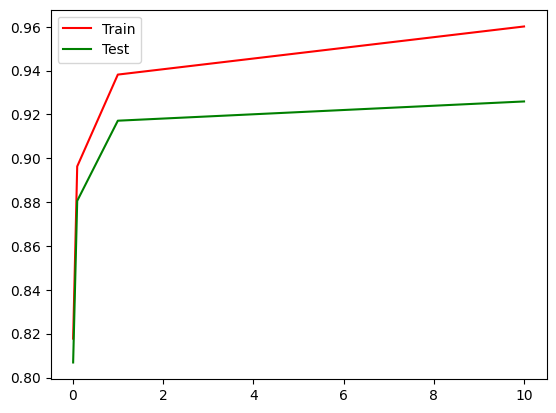

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 

train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)

plt.plot(param_range,train_scores_mean,label='Train',color='r')
plt.plot(param_range,test_scores_mean,label='Test',color='g')
plt.legend(loc='best')
plt.show()

#k=4일 때 최적
#단순한 모형인 경우에는 적합하지만 튜닝할 파라미터가 많은 모형에는 적합하지 않은 방법

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier())])
#                   전처리 - 평균0, 표준편차1     기계학습

param_grid = [
    {'clf__weights': ['uniform','distance'],
     'clf__p': [1,2],
     'clf__n_neighbors': list(range(2,6))
    }
]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
#                   분류기          후보변수                평가기준           교차검증횟수   cpu 코어 수 -1 모든 코어

gs.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf__n_neighbors': [2, 3, 4, 5], 'clf__p': [1, 2],
                          'clf__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [10]:
gs.cv_results_["params"]

[{'clf__n_neighbors': 2, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 2, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 2, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 2, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 4, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 4, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 4, 'clf__p': 2, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'uniform'},
 {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'distance'},
 {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform'},
 {'

In [11]:
gs.cv_results_["mean_test_score"]

array([0.85011431, 0.84718793, 0.83173297, 0.83758573, 0.86666667,
       0.86611797, 0.85569273, 0.85569273, 0.86785551, 0.86611797,
       0.852492  , 0.85697302, 0.87489712, 0.87398262, 0.86053955,
       0.8604481 ])

In [12]:
print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.8748971193415637
{'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'uniform'}
Pipeline(steps=[('scl', StandardScaler()), ('clf', KNeighborsClassifier(p=1))])


In [13]:
from sklearn.model_selection import cross_val_score

p=Pipeline([('scl', StandardScaler()),
            ('clf', KNeighborsClassifier(n_neighbors=4, p=2, weights='uniform'))])

result=cross_val_score(p, X, y, cv=10)

#교차검증 결과
print(result)

#교차검증 평균값
print(np.mean(result))

#교차검증 최대값
print(np.max(result))

[0.8702011  0.85466179 0.79250457 0.81535649 0.82175503 0.80237877
 0.84354986 0.85269899 0.83257091 0.85269899]
0.8338376505968679
0.870201096892139
